# Gradient Descent Visualization

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates:
* Gradient descent with fixed step size
* Interactive visualization of influence of step size

In [1]:
import importlib
autograd_available = True
# if automatic differentiation is available, use it
try:
    import autograd
except ImportError:
    autograd_available = False
    pass

if autograd_available:
    import autograd.numpy as np    
    from autograd import elementwise_grad as egrad
else:
    import numpy as np
    
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib inline 

if autograd_available:
    print('Using autograd to compute gradients')
else:
    print('Using hand-calculated gradient')

Using autograd to compute gradients


Specify the function to minimize as a simple python function.<br>
We have implemented some test functions that can be selected using the function selector, however, you are free to implement your own functions.<br>
Right now, we have implemented the following functions:
1. $\frac{1}{2}x^2$, which is convex and has a global minimum at $x=0$
2. $\frac{1}{2}x^3$, which has no global minimum, but an inflection point at $x=0$
3. $x^2+x^3$, which has a minimum at $x=0$ and a maximum at $x=-\frac{2}{3}$

The derivative is automatically computed using the autograd library, which returns a function that evaluates the gradient of myfun

In [2]:
function_select = 3

def myfun(x):
    functions = {
        1: 0.5*x**2,
        2: 0.5*x**3,
        3: x**2+x**3
    }
    return functions.get(function_select)

if autograd_available:
    gradient = egrad(myfun)
else:
    def gradient(x):
        functions = {
            1: x,
            2: 1.5*x**2,
            3: 2*x+3*x**2
        }
        return functions.get(function_select)


Plot the function and its derivative

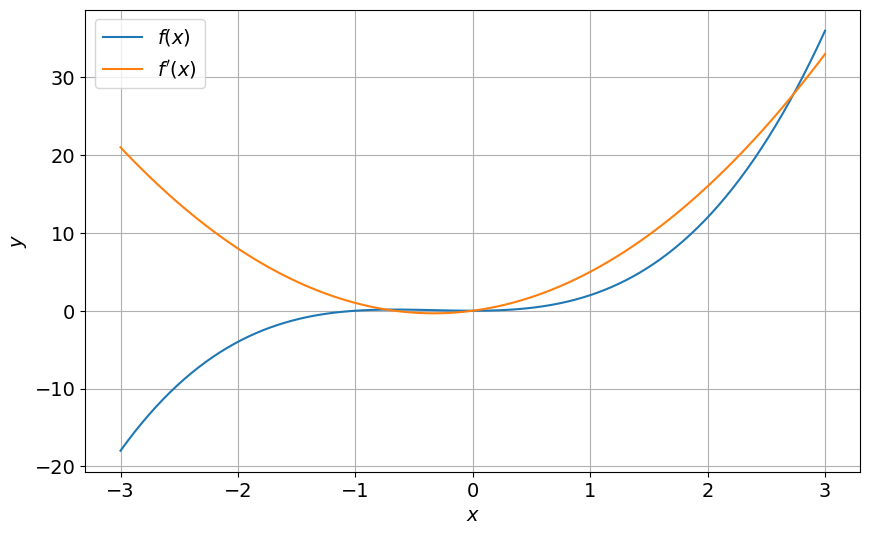

In [3]:
x = np.linspace(-3,3,100)
fy = myfun(x)
gy = gradient(x) 

plt.figure(1,figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x,fy,x,gy)
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend([r"$f(x)$",r"$f^\prime(x)$"])
plt.show()

## Simple gradient descent strategy using only sign of the derivative
Carry out the simple gradient descent strategy by using only the sign of the gradient
\begin{equation*}
x_i = x_{i-1} - \epsilon\cdot \mathrm{sign}(f^\prime(x_{i-1}))
\end{equation*}

In [4]:
epsilon = 0.5
start = 3.75

points = []
while abs(gradient(start)) > 1e-8 and len(points) < 50:
    points.append( (start,myfun(start)) )
    start = start - epsilon*np.sign(gradient(start))

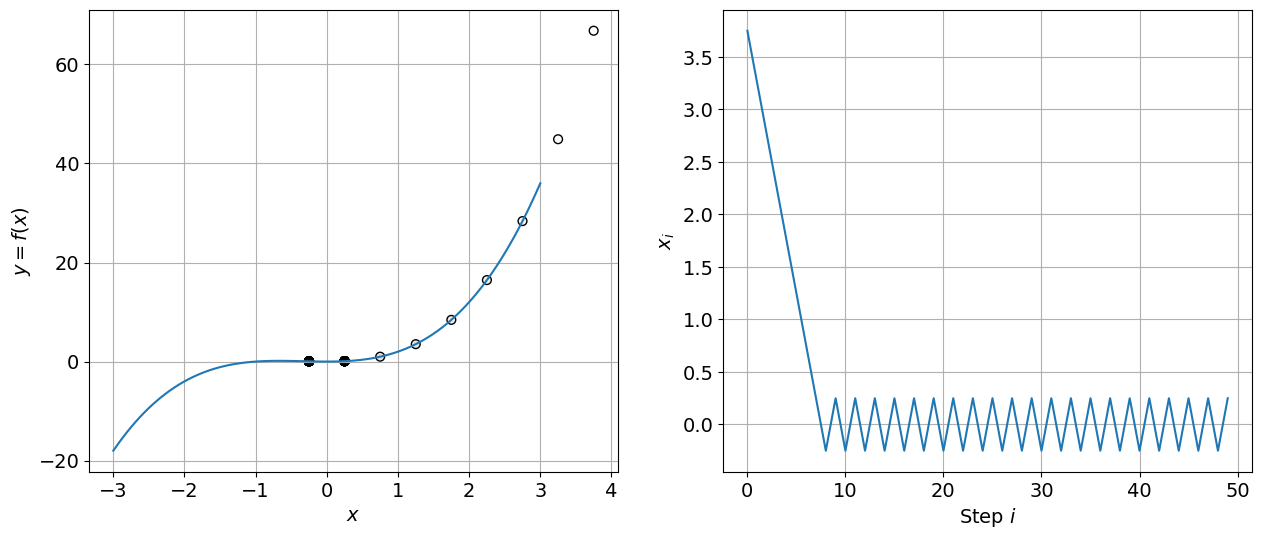

In [5]:
plt.figure(1,figsize=(15,6))
plt.rcParams.update({'font.size': 14})
plt.subplot(1,2,1)
plt.scatter(list(zip(*points))[0],list(zip(*points))[1],c=range(len(points),0,-1),cmap='gray',s=40,edgecolors='k')
plt.plot(x,fy)
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y=f(x)$")

plt.subplot(1,2,2)
plt.plot(range(0,len(points)),list(zip(*points))[0])
plt.grid(True)
plt.xlabel(r"Step $i$")
plt.ylabel(r"$x_i$")
plt.show()

***
## Gradient descent
Carry out the final gradient descent strategy, which is given by
\begin{equation*}
x_i = x_{i-1} - \epsilon\cdot f^\prime(x_{i-1})
\end{equation*}

In [6]:
epsilon = 0.01
start = 3.75

points = []
while abs(gradient(start)) > 1e-8 and len(points) < 500:
    points.append( (start,myfun(start)) )
    start = start - epsilon*gradient(start)    

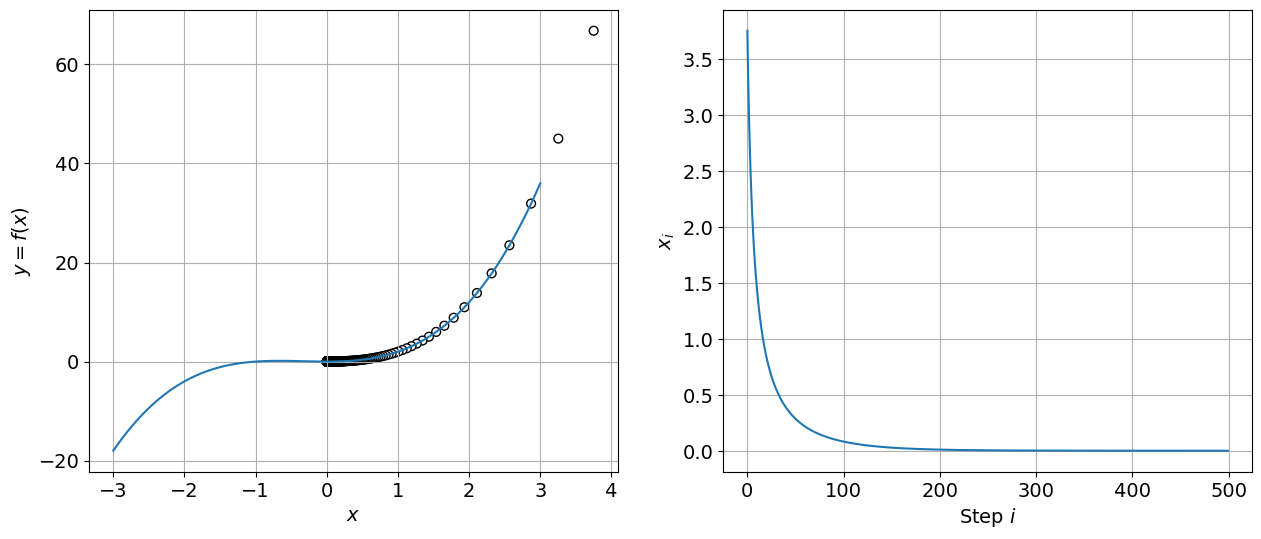

In [7]:
plt.figure(1,figsize=(15,6))
plt.rcParams.update({'font.size': 14})
plt.subplot(1,2,1)
plt.scatter(list(zip(*points))[0],list(zip(*points))[1],c=range(len(points),0,-1),cmap='gray',s=40,edgecolors='k')
plt.plot(x,fy)
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y=f(x)$")

plt.subplot(1,2,2)
plt.plot(range(0,len(points)),list(zip(*points))[0])
plt.grid(True)
plt.xlabel(r"Step $i$")
plt.ylabel(r"$x_i$")
plt.show()

***
Here, we provide an interactive tool to play around yourself with parameters of the gradient descent.

In [8]:
def interactive_gradient_descent(start,epsilon, maximum_steps, xmin, xmax):
    points = []
    # assume 1e-10 is about zero
    while abs(gradient(start)) > 1e-10 and len(points) < maximum_steps:
        points.append( (start,myfun(start)) )
        start = start - epsilon*gradient(start)    
        
    plt.figure(1,figsize=(15,6))
    plt.rcParams.update({'font.size': 14})
    plt.subplot(1,2,1)
    plt.scatter(list(zip(*points))[0],list(zip(*points))[1],c=range(len(points),0,-1),cmap='gray',s=40,edgecolors='k')
    px = np.linspace(xmin,xmax,1000)
    pfy = myfun(px)    
    plt.plot(px,pfy)
    plt.autoscale(enable=True,tight=True)
    plt.xlim(xmin,xmax)
    plt.grid(True)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y=f(x)$")

    plt.subplot(1,2,2)
    plt.plot(range(0,len(points)),list(zip(*points))[0])
    plt.grid(True)
    plt.xlabel("Step $i$")
    plt.ylabel(r"$x_i$")
    plt.show()    

In [9]:
epsilon_values = np.arange(0.0,0.1,0.0001)
style = {'description_width': 'initial'}
interactive_update = interactive(interactive_gradient_descent, \
                                 epsilon = widgets.SelectionSlider(options=[("%g"%i,i) for i in epsilon_values], value=0.01, continuous_update=False,description='epsilon',layout=widgets.Layout(width='50%'),style=style), \
                                 start = widgets.FloatSlider(min=-5.0,max=5.0,step=0.0001,value=3.7, continuous_update=False, description='Start x', layout=widgets.Layout(width='75%'), style=style), \
                                 maximum_steps = widgets.IntSlider(min=20, max=500, value= 200, continuous_update=False, description='Number steps',layout=widgets.Layout(width='50%'),style=style), \
                                 xmin = widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5, continuous_update=False, description='Plot negative x limit',layout=widgets.Layout(width='50%'), style=style), \
                                 xmax = widgets.FloatSlider(min=0, max=10, step=0.1, value=5, continuous_update=False, description='Plot positive x limit',layout=widgets.Layout(width='50%'),style=style))


output = interactive_update.children[-1]
output.layout.height = '500px'
interactive_update

interactive(children=(FloatSlider(value=3.7, continuous_update=False, description='Start x', layout=Layout(wid…